New housing builds by property type analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('./Data/Average-prices-Property-Type.csv')

In [34]:
data.head()

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,1995-01-01,England,E92000001,86969.0,18.6,NaN,NaN,49270.0,17.8,NaN,NaN,38864.0,16.6,NaN,NaN,40489,17.8,NaN,NaN
1,1995-01-01,Wales,W92000004,66840.0,20.9,NaN,NaN,39500.0,19.7,NaN,NaN,30772.0,19.3,NaN,NaN,31323,24.4,NaN,NaN
2,1995-01-01,Inner London,E13000001,239573.0,12.4,NaN,NaN,129730.0,11.5,NaN,NaN,99972.0,11.1,NaN,NaN,77215,13.3,NaN,NaN
3,1995-01-01,Outer London,E13000002,172477.0,15.2,NaN,NaN,96639.0,14.2,NaN,NaN,72755.0,13.6,NaN,NaN,57785,16.5,NaN,NaN
4,1995-01-01,London,E12000007,176754.0,15.0,NaN,NaN,99239.0,13.9,NaN,NaN,80634.0,12.8,NaN,NaN,67007,14.5,NaN,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139898 entries, 0 to 139897
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          139898 non-null  object 
 1   Region_Name                   139898 non-null  object 
 2   Area_Code                     139898 non-null  object 
 3   Detached_Average_Price        139533 non-null  float64
 4   Detached_Index                139533 non-null  float64
 5   Detached_Monthly_Change       139138 non-null  float64
 6   Detached_Annual_Change        134817 non-null  float64
 7   Semi_Detached_Average_Price   139533 non-null  float64
 8   Semi_Detached_Index           139533 non-null  float64
 9   Semi_Detached_Monthly_Change  139138 non-null  float64
 10  Semi_Detached_Annual_Change   134817 non-null  float64
 11  Terraced_Average_Price        139644 non-null  float64
 12  Terraced_Index                139644 non-nul

In [36]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [37]:
data.to_csv('test.csv')

In [38]:
data["Detached_Average_Price"] = pd.to_numeric(data["Detached_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025)]


detached_yearly_avg = (
    data.groupby("Year")["Detached_Average_Price"]
         .mean()
         .reset_index(name="Detached_AvgPrice_UK_Yearly")
)

print(detached_yearly_avg)

    Year  Detached_AvgPrice_UK_Yearly
0   2005                281879.519932
1   2006                297791.949958
2   2007                328918.038168
3   2008                327981.762511
4   2009                296961.994275
5   2010                325368.032867
6   2011                328938.661366
7   2012                333238.940628
8   2013                346718.582485
9   2014                379837.770356
10  2015                408858.687023
11  2016                440305.916667
12  2017                458795.263571
13  2018                470486.235369
14  2019                471881.979856
15  2020                485820.119593
16  2021                512625.840331
17  2022                562877.070399
18  2023                567776.296014
19  2024                559201.201866
20  2025                571981.456489


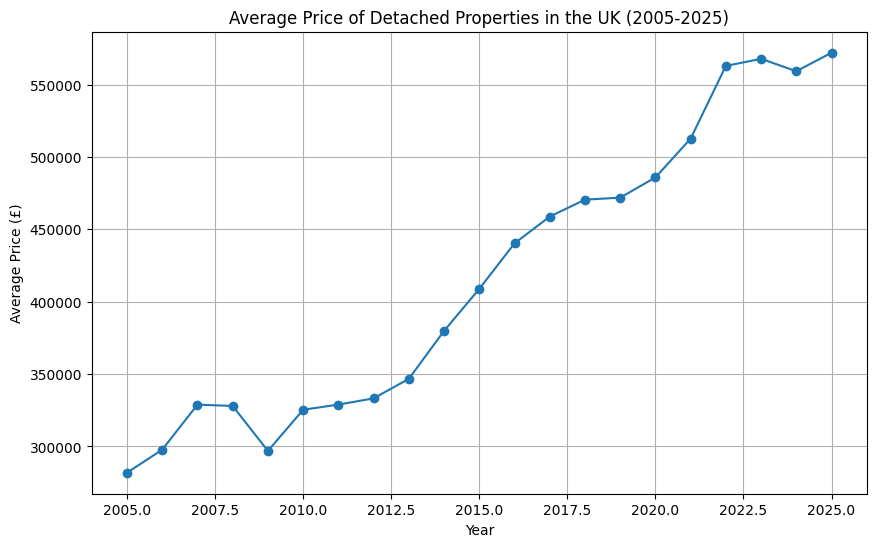

In [39]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(detached_yearly_avg["Year"], detached_yearly_avg["Detached_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of Detached Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show()   